In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [4]:
url = "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv"
data = pd.read_csv(url, header=0, parse_dates=[0], index_col=0,)
train = data.iloc[:-12] 
test = data.iloc[-12:]

In [7]:
train.shape

(132, 1)

In [8]:
test.shape

(12, 1)

In [5]:
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()

/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:
arima_forecast = arima_result.forecast(steps=12)

In [7]:
sarimax_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)) 
sarimax_result = sarimax_model.fit()
sarimax_forecast = sarimax_result.forecast(steps=12)

/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39140D+00    |proj g|=  6.86568D-02

At iterate    5    f=  3.38797D+00    |proj g|=  3.03804D-02

At iterate   10    f=  3.38299D+00    |proj g|=  2.47863D-02

At iterate   15    f=  3.37783D+00    |proj g|=  4.65633D-03

At iterate   20    f=  3.37679D+00    |proj g|=  2.46297D-03

At iterate   25    f=  3.37659D+00    |proj g|=  7.25093D-04

At iterate   30    f=  3.37654D+00    |proj g|=  1.58210D-03

At iterate   35    f=  3.37652D+00    |proj g|=  2.84985D-04

At iterate   40    f=  3.37652D+00    |proj g|=  7.29608D-05

At iterate   45    f=  3.37651D+00    |proj g|=  1.28646D-04

At iterate   50    f=  3.37651D+00    |proj g|=  2.40989D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


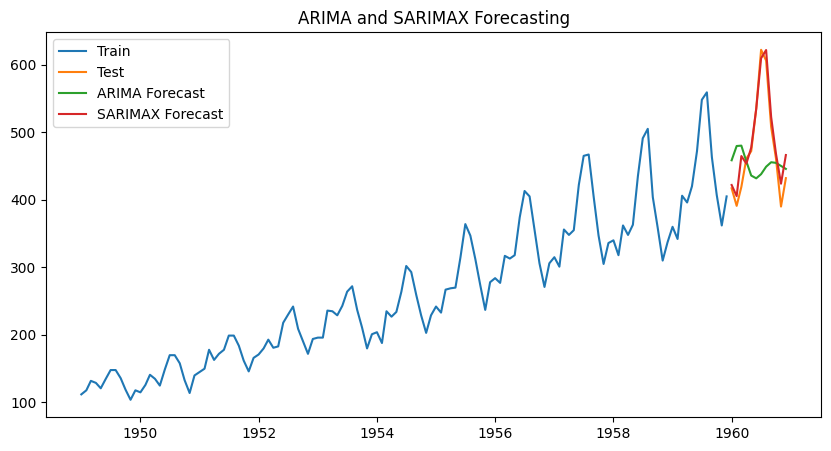

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.plot(sarimax_forecast, label='SARIMAX Forecast')
plt.legend()
plt.title('ARIMA and SARIMAX Forecasting')
plt.show()

In [9]:
#MAE
arima_mae = mean_absolute_error(test, arima_forecast)
sarimax_mae = mean_absolute_error(test, sarimax_forecast)
#RMSE
arima_mse = mean_squared_error(test, arima_forecast)
arima_rmse = np.sqrt(arima_mse)
sarimax_mse = mean_squared_error(test, sarimax_forecast)
sarimax_rmse = np.sqrt(sarimax_mse)
print(f"ARIMA MAE: {arima_mae:.2f}, SARIMAX MAE: {sarimax_mae:.2f}" )
print(f"ARIMA RMSE: {arima_rmse:.2f}, SARIMAX RMSE: {sarimax_rmse:.2f}")

ARIMA MAE: 67.39, SARIMAX MAE: 16.32
ARIMA RMSE: 86.81, SARIMAX RMSE: 21.19
